In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import manifold
import umap.umap_ as umap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations


100%|██████████| 754M/754M [02:51<00:00, 4.62MB/s] 


In [3]:
np.random.seed(23)

file = './2019-airline-delays-and-cancellations/full_data_flightdelay.csv'
df = pd.read_csv(file)
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 5.8) | (df['SNOW'] > 8.6) | (df['SNWD'] > 12.5)]

# Exploratory Data Analysis

In [4]:
# Summary statistics
print(df.shape)
print(df.describe())

(5758, 7)
              PRCP         SNOW         SNWD         TMAX         AWND   
count  5758.000000  5758.000000  5758.000000  5758.000000  5758.000000  \
mean      3.260952     1.068496     9.016464    50.479680     8.591320   
std       4.208835     2.991824     8.234215    24.494015     4.749927   
min       0.000000     0.000000     0.000000     2.000000     0.890000   
25%       0.000000     0.000000     0.000000    31.000000     4.920000   
50%       0.150000     0.000000    13.000000    40.000000     8.050000   
75%       7.130000     0.000000    16.100000    80.000000    10.740000   
max      11.630000    17.200000    25.200000    83.000000    21.920000   

         DEP_DEL15  
count  5758.000000  
mean      0.262591  
std       0.440080  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


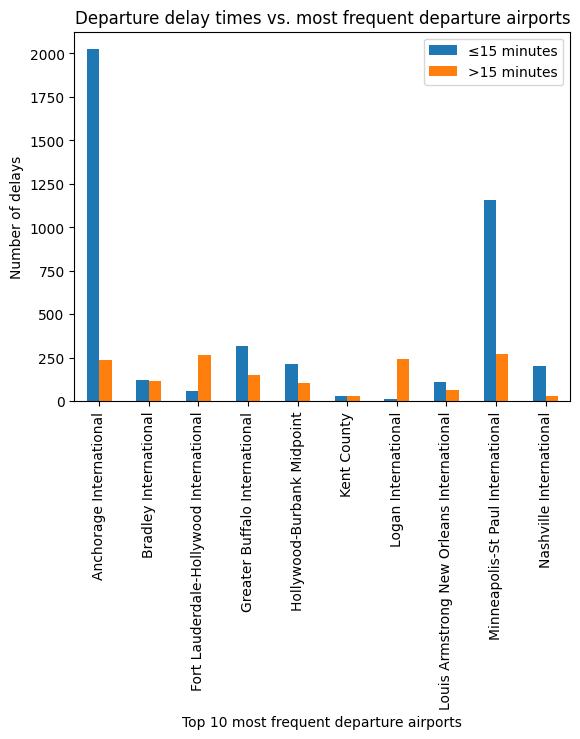

In [5]:
# Top 10 airports
top_airports = df['DEPARTING_AIRPORT'].value_counts().index[:10]
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Bar chart
grouped = df_filtered.groupby(['DEPARTING_AIRPORT', 'DEP_DEL15']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=False)
plt.title('Departure delay times vs. most frequent departure airports')
plt.xlabel('Top 10 most frequent departure airports')
plt.ylabel('Number of delays')
plt.legend(['≤15 minutes', '>15 minutes']) 
plt.show()

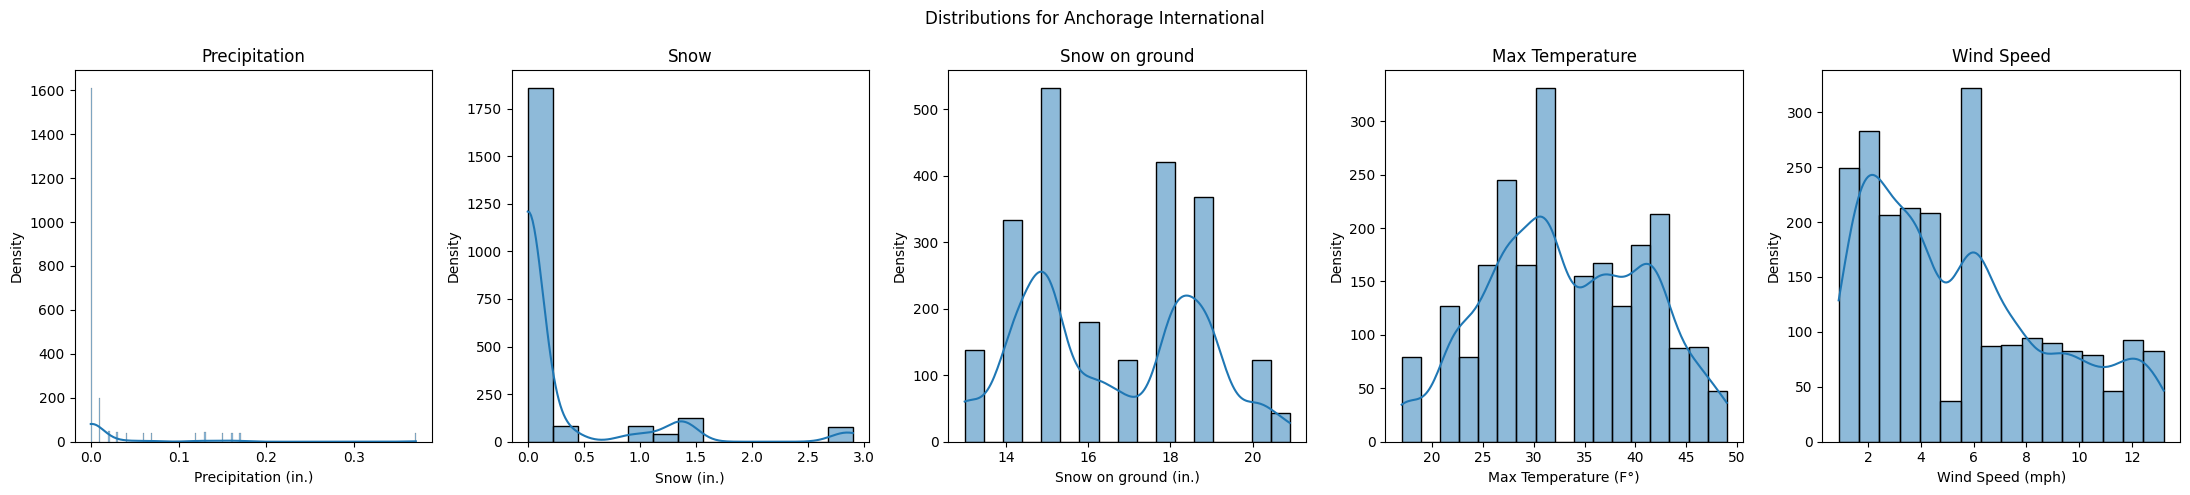

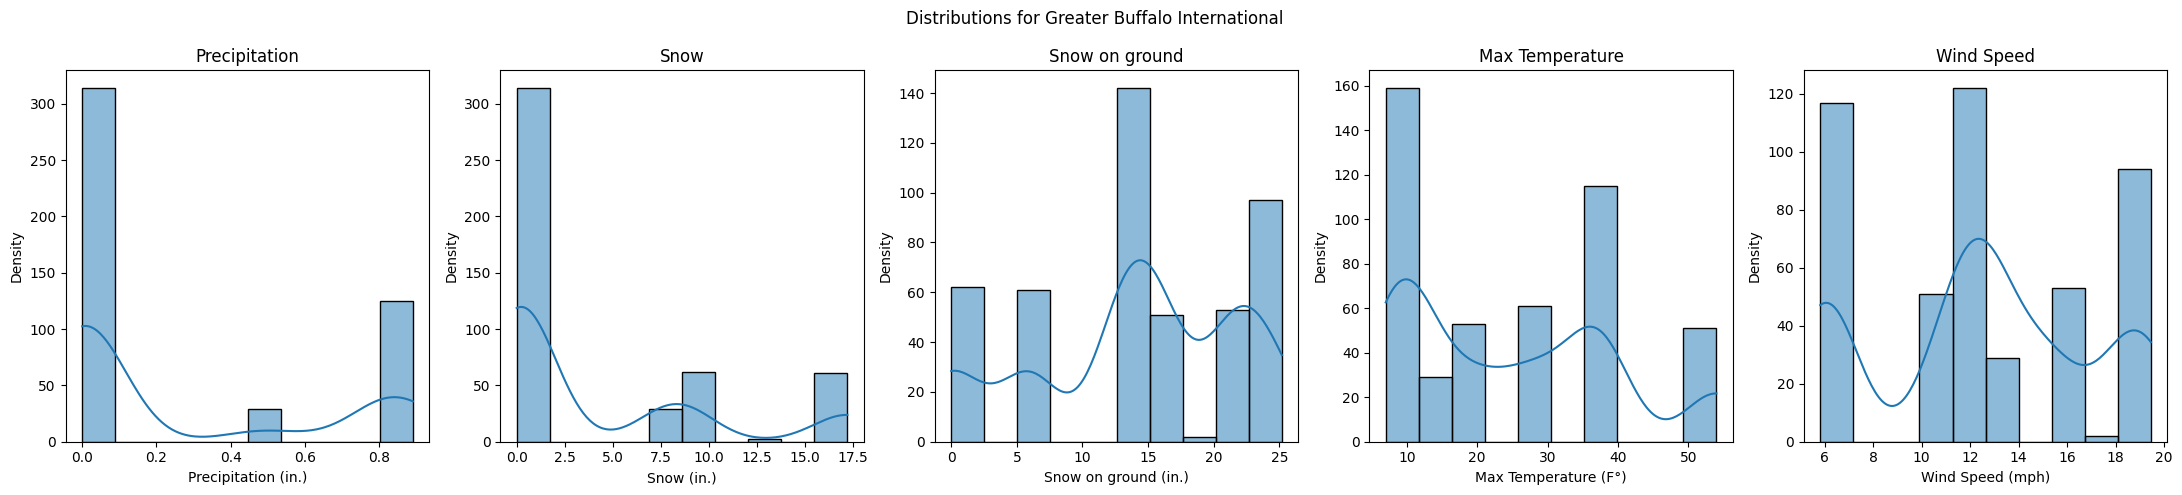

In [6]:
top_airports = ['Anchorage International', 'Greater Buffalo International']
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Distributions
variables = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
titles = ['Precipitation', 'Snow', 'Snow on ground', 'Max Temperature', 'Wind Speed']
x_labels = ['Precipitation (in.)', 'Snow (in.)', 'Snow on ground (in.)', 'Max Temperature (F°)', 'Wind Speed (mph)']
for airport in top_airports:
    fig, axs = plt.subplots(1, len(variables), figsize=(22, 5))
    fig.suptitle(f'Distributions for {airport}')
    for i, var in enumerate(variables):
        sns.histplot(df_filtered[df_filtered['DEPARTING_AIRPORT'] == airport][var], kde=True, ax=axs[i])
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(x_labels[i])
        axs[i].set_ylabel('Density')
    plt.tight_layout()
    plt.show()

## Normalize Features

In [7]:
scaler = StandardScaler()
df[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']] = scaler.fit_transform(
    df[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']])

## Dimensionality Reduction

## PCA

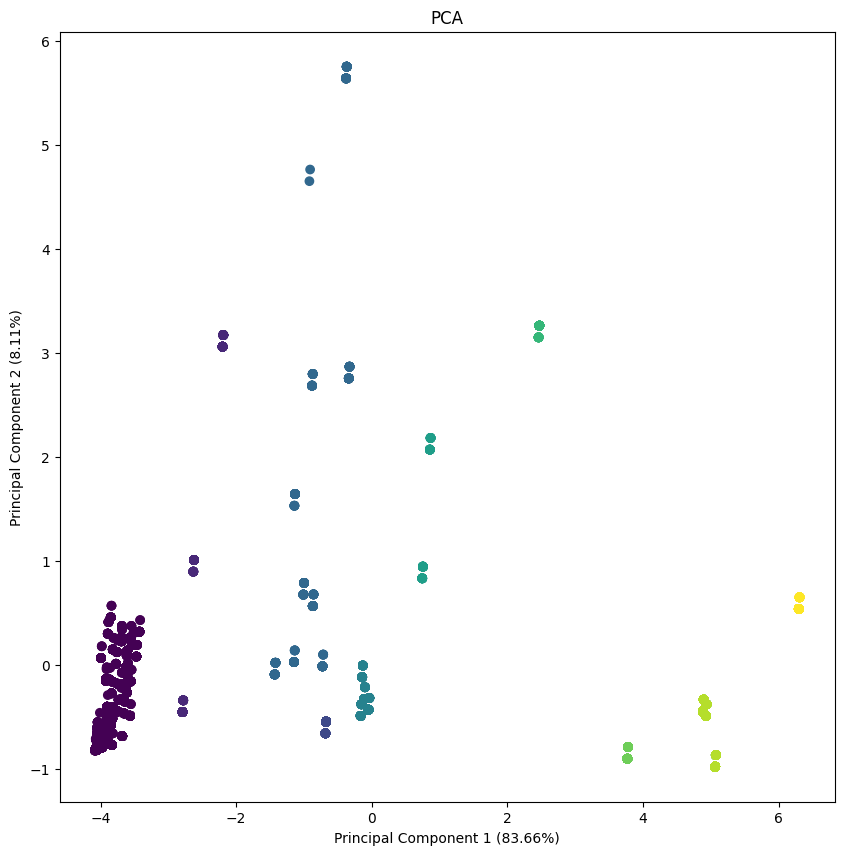

In [8]:
# Encode 'DEPARTING_AIRPORT' feature
temp = df
le = LabelEncoder()
temp['DEPARTING_AIRPORT'] = le.fit_transform(temp['DEPARTING_AIRPORT'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(temp)

# % of variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot
fig, axs = plt.subplots(1, figsize=(10, 10))
axs.scatter(pca_results[:, 0], pca_results[:, 1],
            c=temp['DEPARTING_AIRPORT'])
axs.set_title('PCA')
axs.set_xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
axs.set_ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
plt.show()

## t-SNE

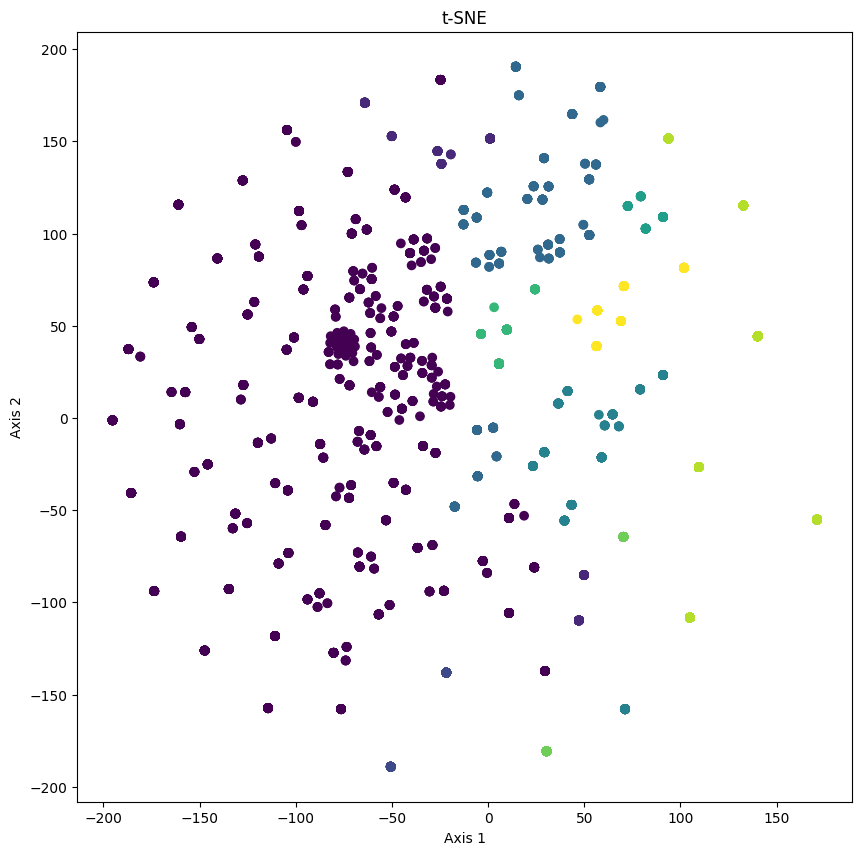

In [9]:
# Dimensionality reduction with t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=40,
                     init='pca', random_state=23)
fit_tsne = tsne.fit_transform(temp)

# Plot
fig, axs = plt.subplots(1, figsize=(10, 10))
axs.scatter(fit_tsne[:, 0], fit_tsne[:, 1],
            c=temp['DEPARTING_AIRPORT'])
axs.set_title('t-SNE')
axs.set_xlabel(f'Axis 1')
axs.set_ylabel(f'Axis 2')
plt.show()

## MDS

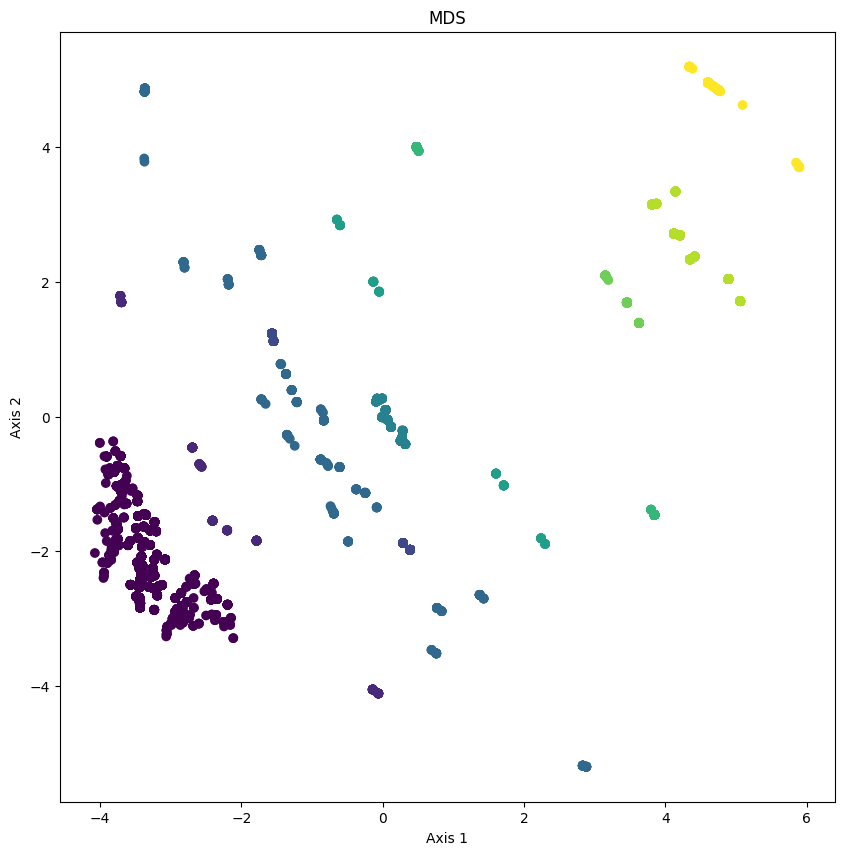

In [10]:
# Dimensionality reduction with MDS
mds = manifold.MDS(n_components=2, n_init=1,
                           max_iter=120, n_jobs=2, random_state=23)
fit_mds = mds.fit_transform(temp)

# Plot
fig, axs = plt.subplots(1, figsize=(10, 10))
axs.scatter(fit_mds[:, 0], fit_mds[:, 1],
            c=temp['DEPARTING_AIRPORT'])
axs.set_title('MDS')
axs.set_xlabel(f'Axis 1')
axs.set_ylabel(f'Axis 2')
plt.show()

## UMAP

/Users/kiran/miniconda3/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0, 0.5, 'Axis 2')

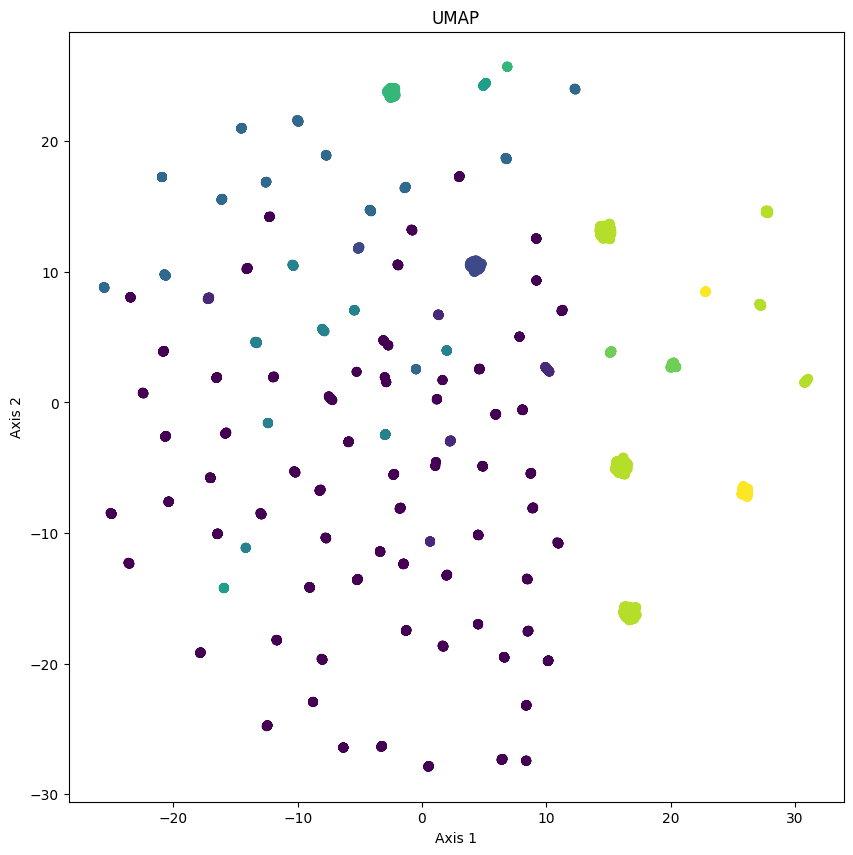

In [11]:
# Dimensionality reduction with UMAP
reducer = umap.UMAP(random_state=23)
fit_umap = reducer.fit_transform(temp)

# Plot
fig, axs = plt.subplots(1, figsize=(10, 10))
axs.scatter(fit_umap[:, 0], fit_umap[:, 1],
            c=temp['DEPARTING_AIRPORT'])
axs.set_title('UMAP')
axs.set_xlabel(f'Axis 1')
axs.set_ylabel(f'Axis 2')

# Modeling

## Train Test Split

In [12]:
df = pd.get_dummies(df, columns=['DEPARTING_AIRPORT'], drop_first=True)
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

Accuracy: 0.8133680555555556
Precision: 0.7792207792207793
Sensitivity: 0.9600470035252644
Specificity: 0.39867109634551495


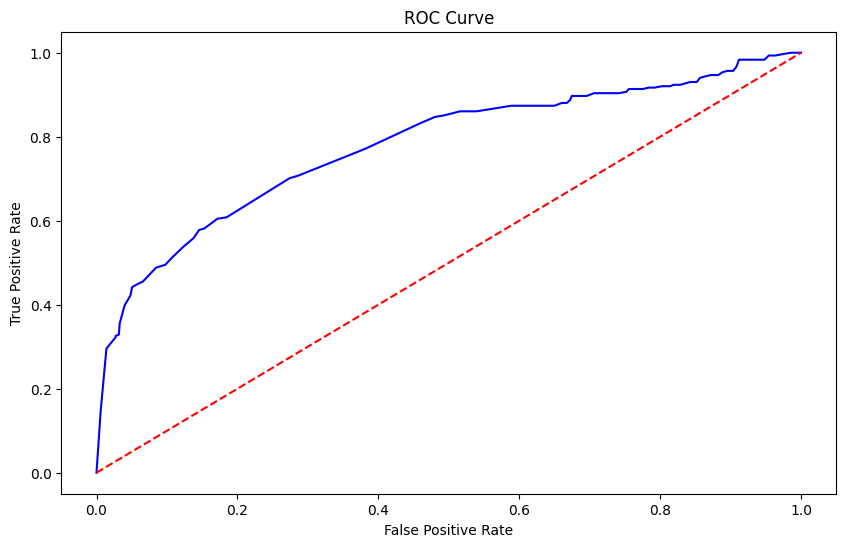

AUC: 0.7783826727203876


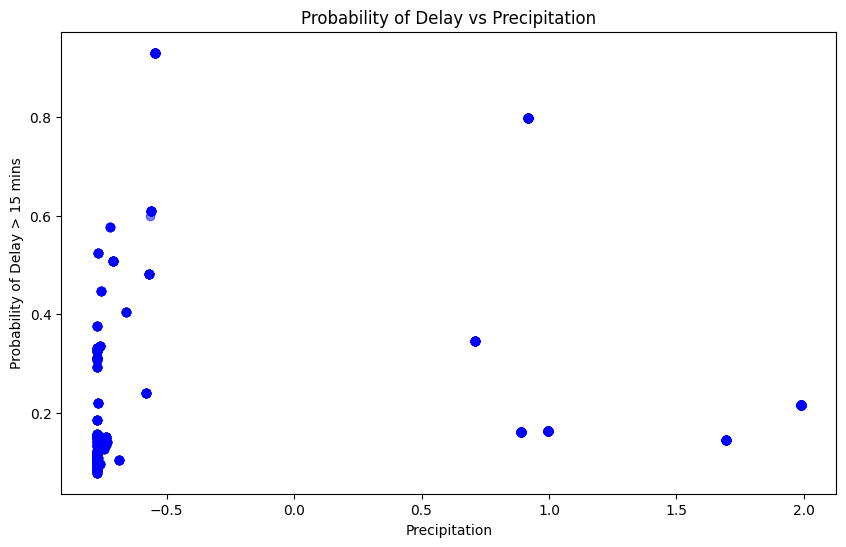

In [13]:
# Train model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Calculate accuracy, precision, sensitivity (recall), and specificity
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC curve and AUC
probabilities = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probabilities)
print("AUC:", auc)

# Probabilities plot
probabilities = log_reg.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PRCP'], probabilities, color='blue',
            alpha=0.5)
plt.xlabel('Precipitation')
plt.ylabel('Probability of Delay > 15 mins')
plt.title('Probability of Delay vs Precipitation')
plt.show()

## Model Summary

In [14]:
summary = pd.DataFrame(zip(X_train.columns, np.transpose(log_reg.coef_)),
             columns=['features', 'coef'])
summary.loc[14] = ['Intercept', log_reg.intercept_]
summary

,features,coef
0,PRCP,[0.4948731046747848]
1,SNOW,[0.13770674783650155]
2,SNWD,[0.27323754256766863]
3,TMAX,[-0.37497118708404803]
4,AWND,[0.2841884600433157]
5,DEPARTING_AIRPORT_1,[1.779679119129909]
6,DEPARTING_AIRPORT_2,[3.5670732829163265]
7,DEPARTING_AIRPORT_3,[0.5952950286263986]
8,DEPARTING_AIRPORT_4,[1.4870797554098962]
9,DEPARTING_AIRPORT_5,[1.154385417160691]
